# Linear Regression Implementation


## 1. Considerations
*__Simple linear regression__ with a single variable, also known as "univariate linear regression," is a fundamental technique in statistics and machine learning. It is used to model and analyze the relationship between a single independent variable and a dependent variable.*<br>

*The goal of simple linear regression is to find a linear relationship between the variables that can be used to make predictions or understand the nature of their association.*

#### 1.1 Analytical Solution
*In the context of simple linear regression, it is generally better to use analytical (closed-form) methods to calculate the Mean Squared Error (MSE) rather than numerical methods. Simple linear regression involves fitting a line to a set of data points, and the calculation of the coefficients (slope and intercept) and the MSE can be done analytically, providing precise results.*<br>
- *__Efficiency:__ Analytical methods for simple linear regression provide an exact solution in a single step. Calculating the coefficients (slope and intercept) and the MSE directly is computationally efficient, especially for small to moderately sized datasets.*

- *__Exact Solution:__ The analytical solution yields the exact coefficients that minimize the MSE. It provides a clear, closed-form solution without the need for iterative numerical optimization methods.*

#### 1.2 Choses mathématiques

$$
\exist \: \alpha,\beta \in \: \Reals \\[3pt]
\exist \: x_i,y_i \in \: X, Y \\[3pt]
y_i = f(x_i) \\[10pt]
\text{Equation of the line is: } \: \hat{Y} = X\alpha + \beta \\[10pt]
\text{MSE is used as a cost function} \\[3pt]
Err = \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2 \\[3pt]
Err = \sum_{i=1}^{n} (Y_i - X_i\alpha - \beta)^2 \\[50pt]

argmin_{\alpha,\beta \in \Reals} = \sum_{i=1}^{n} (Y_i - X_i\alpha - \beta)^2 \\[50pt]

\text{Finding } \beta \\[3pt]
\frac{\partial Err}{\partial \beta}[\sum_{i=1}^{n} (Y_i - X_i\alpha - \beta)^2] = -2\sum_{i=1}^{n} (Y_i - X_i\alpha - \beta) \\[3pt]
0 = -2\sum_{i=1}^{n} (Y_i - X_i\alpha - \beta) \\[3pt]
0 = \sum_{i=1}^{n} (Y_i - X_i\alpha - \beta) \\[3pt]
0 = \sum_{i=1}^{n}Y_i - \sum_{i=1}^{n} X_i\alpha - \sum_{i=1}^{n} \beta \\[3pt]
0 = \sum_{i=1}^{n}Y_i - \alpha \sum_{i=1}^{n} X_i - \beta n \\[3pt]
\beta n = \sum_{i=1}^{n}Y_i - \alpha\sum_{i=1}^{n} X_i \\[8pt]
\beta = \frac{\sum_{i=1}^{n}Y_i - \alpha\sum_{i=1}^{n} X_i}{n} \\[8pt]
\beta = \hat{Y} - \hat{X} \alpha \\[50pt]

\text{Finding } \alpha \\[3pt]
\frac{\partial Err}{\partial \alpha}[\sum_{i=1}^{n} (Y_i - X_i\alpha - \beta)^2] = -2\sum_{i=1}^{n} X_i(Y_i - X_i\alpha - \beta) \\[3pt]
0 = -2\sum_{i=1}^{n} (Y_i X_i - X_i^2\alpha - X_i\beta) \\[3pt]
0 = \sum_{i=1}^{n} (Y_i X_i - X_i^2\alpha - X_i\hat{Y} + X_i \hat{X} \alpha) \\[3pt]
0 = \sum_{i=1}^{n} X_i Y_i - X_i \hat{Y} - \alpha \sum_{i=1}^{n}X_i^2 - X_i \hat{X} \\[3pt]
\alpha \sum_{i=1}^{n}X_i^2 - X_i \hat{X} = \sum_{i=1}^{n} X_i Y_i - X_i \hat{Y} \\[3pt]
\alpha = \frac{\sum_{i=1}^{n} X_i Y_i - X_i \hat{Y}}{\sum_{i=1}^{n}X_i^2 - X_i \hat{X}} \\[3pt]
\alpha = \frac{\sum_{i=1}^{n} X_i Y_i - \sum_{i=1}^{n}X_i \hat{Y}}{\sum_{i=1}^{n}X_i^2 - \sum_{i=1}^{n}X_i \hat{X}} \\[3pt]
\alpha = \frac{n\sum_{i=1}^{n} X_i Y_i - \sum_{i=1}^{n}X_i \sum_{i=1}^{n}Y_i}{n\sum_{i=1}^{n}X_i^2 - (\sum_{i=1}^{n}X_i)^2} \\[50pt]

\beta = \frac{\sum_{i=1}^{n}Y_i\sum_{i=1}^{n}X_i^2 - \sum_{i=1}^{n}X_i\sum_{i=1}^{n}X_iY_i}{n\sum_{i=1}^{n}X_i^2-(\sum_{i=1}^{n}X_i)^2}
$$


#### 1.3 NumPy Implementation 
*In this section describe the system environment on which the software will be executing. Include any specific reasons why this system was chosen and if there are any plans to include new sections to the list of current ones.*


In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [143]:
data = pd.read_csv("./tvmarketing.csv")
x = data["TV"].values
y = data["Sales"].values



1. **Slope**:
   
   $$ \alpha = \frac{n\sum_{i=1}^{n} X_i Y_i - \sum_{i=1}^{n}X_i \sum_{i=1}^{n}Y_i}{n\sum_{i=1}^{n}X_i^2 - (\sum_{i=1}^{n}X_i)^2}$$

   

2. **Intercept**:
   
   $$ \beta = \bar{y} - \alpha\bar{x} $$




In [147]:
def unvariate_linear_regression(x,y):
    n = x.shape[0]

    x_y_sum = (x*y).sum()
    x_sum = x.sum()
    y_sum = y.sum()

    x_x_sum = np.square(x).sum()
    x_sum_2 = np.square(x.sum())

    alpha = (n*x_y_sum - x_sum*y_sum)/(n*x_x_sum - x_sum_2)
    beta = y.sum()/n - alpha*(x.sum()/n)
    
    slope = alpha
    intercept = beta

    
    return (slope, intercept)

def unvariate_linear_regression_predict(x, slope, intercept):
    predicted = x*slope + intercept
    return predicted
    

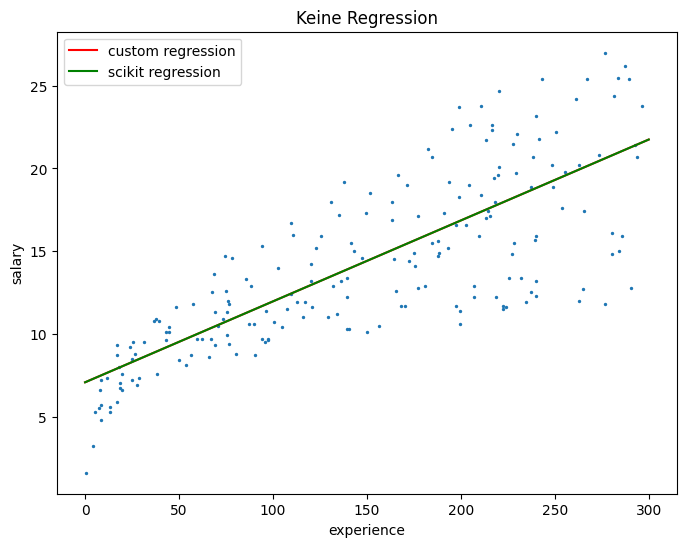

In [151]:
x_train = x[:int(len(x)*0.8)]
x_test = x[int(len(x)*0.8):]
y_train = y[:int(len(x)*0.8)]
y_test = y[int(len(x)*0.8):]

# Calculate slope and intercept using custom regression
slope_custom, intercept_custom = unvariate_linear_regression(x_train,y_train)
# Calculate slope and intercept using sklearn regression
reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train)

# Adjust the figure size
plt.figure(figsize=(8, 6))  # Width x Height in inches

# Create a line plot
plt.scatter(x, y, s=2)

# Generate 200 points from 0 to 60
_x = np.linspace(0, 300, 1000)  

# Plot custom regression
plt.plot(_x, unvariate_linear_regression_predict(_x, slope_custom, intercept_custom), color='red', label='custom regression')
# Plot sklearn regression
plt.plot(_x, reg.predict(_x.reshape(-1, 1)), color='green', label='scikit regression')

# Add labels and a title
plt.xlabel('experience')
plt.ylabel('salary')
plt.title('Keine Regression')
plt.legend()
# Show the plot
plt.show()

In [152]:
print(unvariate_linear_regression_predict(9, slope_custom, intercept_custom))
print(reg.predict(np.array([[9]])))

7.5091986096076155
[7.50919861]
